# Understanding the data that we have

In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
current_working_directory= os.getcwd()
main_directory = os.path.dirname(current_working_directory)
category_data_folder_path = os.path.join(main_directory,"Audio_Data")

In [25]:
def get_child_discomfort_categories(category_data_folder_path):
    child_discomfort_categories_raw = os.listdir(category_data_folder_path)
    
    child_discomfort_categories = []
    for i in child_discomfort_categories_raw:
        cat = i.replace("_"," ")
        cat = " ".join(word.capitalize() for word in cat.split())
        child_discomfort_categories.append(cat)
        
    return child_discomfort_categories_raw, child_discomfort_categories

child_discomfort_categories_raw, child_discomfort_categories = get_child_discomfort_categories(category_data_folder_path)
print(child_discomfort_categories_raw)
print(child_discomfort_categories)

['belly_pain', 'burping', 'discomfort', 'hungry', 'not_cry', 'tired']
['Belly Pain', 'Burping', 'Discomfort', 'Hungry', 'Not Cry', 'Tired']


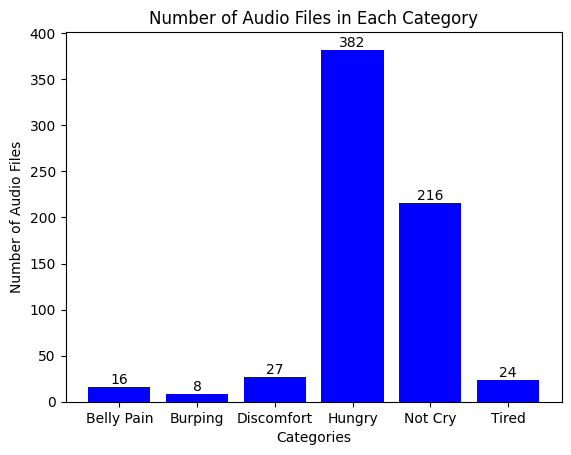

In [27]:
def count_audio_files(folder_path):
    category_counts = {}
    
    for category in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category)
        
        if os.path.isdir(category_path):
            audio_files = [file for file in os.listdir(category_path) if file.endswith('.wav') or file.endswith('.mp3')]
            category_counts[category] = len(audio_files)
    
    return category_counts

def plot_bar_graph(category_counts):
    categories = child_discomfort_categories
    counts = list(category_counts.values())
    
    plt.bar(categories, counts, color='blue')
    plt.xlabel('Categories')
    plt.ylabel('Number of Audio Files')
    plt.title('Number of Audio Files in Each Category')

    for i, count in enumerate(counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

    plt.show()


audio_counts = count_audio_files(category_data_folder_path)
plot_bar_graph(audio_counts)
